![title](https://i.imgur.com/4MEoMNd.png)
![image](https://imgs.xkcd.com/comics/integration_by_parts.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%html
<style>.bs-callout{padding:20px;margin:20px 0;border:1px solid #eee;border-left-width:5px;border-radius:3px}.bs-callout h4{margin-top:0;margin-bottom:5px}.bs-callout p:last-child{margin-bottom:0}.bs-callout code{border-radius:3px}.bs-callout+.bs-callout{margin-top:-5px}.bs-callout-default{border-left-color:#777}.bs-callout-default h4{color:#777}.bs-callout-primary{border-left-color:#428bca; background-color:#e1ecff }.bs-callout-primary h4{color:#428bca}.bs-callout-success{border-left-color:#5cb85c; background-color: #e1ffe5 }.bs-callout-success h4{color:#5cb85c}.bs-callout-danger{border-left-color:#d9534f; background-color: #ffe1e1 }.bs-callout-danger h4{color:#d9534f}.bs-callout-warning{border-left-color:#f0ad4e}.bs-callout-warning h4{color:#f0ad4e}.bs-callout-info{border-left-color:#5bc0de}.bs-callout-info h4{color:#5bc0de}</style>

# Numerical Integration

Over the previous two notebooks, we have slowly built up the numerical tools we need in order to solve the Schrodinger equation in one dimension (finite-difference methods, root finding) as well as undertaking a crash course in all things Python (including functions and arrays). However, there is one tool we're missing. When it comes to normalising our disctretized wavefunction solutions,

$$\left\langle\psi\middle|\psi\right\rangle = \int_{-\infty}^{\infty} \psi(x)^*\psi(x)~dx$$

...how exactly are we meant to compute the integral?

If you haven't already guessed by the name of this notebook, the answer lies in the technique of numerical integration (surprise!).

Aside from calculating the integral of discretized functions, numerical integration can also be used to approximate integrals without analytic solutions, and in cases where the integrand (the function being integrated) itself does not have a known analytic form. In this notebook, we'll explore some common methods of numerical integration.

# The Trapezoidal approximation

Consider the definite integral over an infinitesimal domain:

\begin{align}
	\int_{x}^{x+\delta x} f(\xi)~d\xi, ~~~~ \delta x \ll 1
\end{align}

By defining $F(\xi)=\int f(\xi)~d\xi$ as the antiderivative of function $f(\xi)$ (and equivalently, $F'(\xi)=f(\xi)$), we can now compute the integral *symbolically*:

\begin{align}
	\int_{x}^{x+\delta x} f(\xi)~d\xi = \left[ F(\xi) \right]_{x}^{x+\delta x} =  F(x+\delta x)-F(x)
\end{align}

But that doesn't really help us if we don't know the antiderivative $F(\xi)$, let alone the integrand $f(\xi)$! To see how we might work with this result, we're going to have to revisit our favourite tool, the Taylor series, and make a small mathematical detour.

## Taylor series interpretation

To see how we might **approximate** this, let's have a go taking the Taylor series expansion of the integral around $\delta x$:

\begin{align*}
	\int_{x}^{x+\delta x} f(\xi)~d\xi &= F(x+\delta x)-F(x)\\
	& = \left[F(x) + \delta x F'(x) + \frac{1}{2}\delta x^2 F''(x) + \frac{1}{6}\delta x^3 F'''(x) + O(\delta x^4)\right] -F(x)\\
	& = \delta x f(x) + \frac{1}{2}\delta x^2 f'(x) + \frac{1}{6}\delta x^3 f''(x) + O(\delta x^4)
\end{align*}

where we have made use of the previous relation $F'(\xi)=f(\xi)$.

If we factor out $\delta x/2$, we get

\begin{align}
	\int_{x}^{x+\delta x} f(\xi)~d\xi &= \frac{1}{2}\delta x\left[2f(x) + \delta x f'(x) + \frac{1}{3}\delta x^2 f''(x) + O(\delta x^3)\right]
\end{align}

The trick here is to notice that the bracketed term is similar (but not exactly the same) as the Taylor expansion of $f(x)+f(x+\delta x)$:
\begin{align*}
	f(x)+f(x+\delta x) = 2f(x)+\delta x f'(x) + \frac{1}{6}\delta x^2 f''(x) + O(\delta x^3)
\end{align*}

We can therefore make the following approximation to the integral:

\begin{align}
	\boxed{\int_{x}^{x+\delta x} f(\xi)~d\xi \approx \frac{1}{2}\delta x\left[f(x)+f(x+\delta x)\right]}
\end{align}

Comparing the Taylor series of both sides, we can see that the inherent error of this approximation is of order $\mathcal{O}(\delta x^3)$, or more accurately

\begin{align}
	\text{local error}=-\frac{1}{12}\delta x^3 f''(x)
\end{align}

This is refered to as the **local trapezoidal error**.

---
<div class="alert alert-info">
**Problem 1:**
<br>
Consider the integral $$\int_x^{x+\delta x} \sin^2\left(\frac{x}{2}\right)~dx = \frac{1}{2}(\delta x+\sin(\delta x)-\sin(x+\delta x))$$
<br>
Apply the trapezoidal approximation (eq. 4) to the left hand integral at the point $x=4$, and compare it to the right hand exact solution for various values of $\delta x$.
<br><br>
How small do you have to make $\delta x$ before you get a reasonably accurate result?
</div>

In [6]:
def solnExact(x, dx):
    return 0.5*(dx+np.sin(x)-np.sin(x+dx))
    
def trapezoid(x, dx):
    return 0.5*dx*(np.sin(x/2)**2+np.sin((x+dx)/2)**2)

dx = [0.001, 0.01, 0.1, 0.2, 0.5, 1]

res = [(i,np.abs(trapezoid(4,i)-solnExact(4, i))) for i in dx]
print(res)

[(0.001, 2.7219523726987327e-11), (0.01, 2.707707615935695e-08), (0.1, 2.5618693318976704e-05), (0.2, 0.00019141644261438939), (0.5, 0.0023088836417854419), (1, 0.0085655308275085495)]


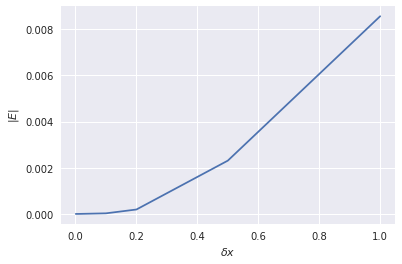

In [7]:
plt.xlabel('$\delta x$')
plt.ylabel('$|E|$')
plt.plot(*zip(*res))

## Geometric interpretation

Using Taylor series expansions helps with deriving the approximation and calculating the local error, but it also helps to consider the **geometric interpretation** of the trapezoidal method.

First off, have a look at the figure below:

![image](https://i.imgur.com/0XcAsSA.png)

The area under the curve, between the two points $f(x)$ and $f(x+\delta x)$, has been approximated by drawing vertical lines to the $x$-axis, and approximating the area via a trapezoid/trapezium:

$$\text{Area} = \frac{1}{2}\delta x[f(x)+f(x+\delta x)]$$

You may be surprised (or maybe not!) to notice that the area of the trapezium is exactly the same as the trapezoidal approximation we derived above - hence the name.

Essentially, what we are doing here is approximating the integral by integrating over a **linear interpolation between the boundary points**.

<br>
<div class="alert alert-success">
**Note:**
<br>
You may notice in the image above that the trapezoidal approximation is *under-estimating* the integral; this is because the example integrand is **concave down** (i.e. $f''(x_0)<0$) over the infinitesimal integration domain.
<br><br>
Analytically, a negative second derivative substituted into the trapezoidal approximation results in $$\text{error}=+\frac{1}{12}\delta x^3 f''(x_0)$$ a *positive* difference, and we can estimate the deviation from the exact solution.
<br><br>
On the other hand, if $f(x)$ was **concave up** ($f''(x_0)>0$) over the integration domain, we can easily see that the trapezoidal method would *over-estimate* the integral.
</div>

## Composite trapezoidal rule 

Everything we have done so far has assumed an **infinitesimal** domain, with $\delta x\ll 1$ - not a situation we usually encounter when dealing with integrals! In practice, when we need  we end up working with integrands with significant or even unknown variation between boundary points.

For example, consider integrating over a function $f(x)$ from $x=a$ to $x=b$. We could apply the trapezoidal approximation, with $\Delta x = b-a$,

\begin{align}
	\int_a^b f(x) dx\approx \frac{1}{2}(b-a)[f(a)+f(b)]
\end{align}

however you can probably see that is a *terrible* approximation -- we are simply drawing a straight line between points $f(a)$ to $f(b)$ and integrating under it, ignoring any regions of non-linearities (for example oscillations). 

Instead, a better approximation is to break up the region $[a,b]$ into $N$ equally spaced intervals of size $\Delta x$, and apply the trapezoidal rule locally to each interval before summing the results:


\begin{align*}
	\int_a^b f(x) dx&\approx \frac{1}{2}\Delta x\left\{[f(a)+f(a+\Delta x)]+ [f(a+\Delta x)+f(a+2\Delta x)]+ \cdots + [f(a+(N-1)\Delta x)+f(b)]\right\}
\end{align*}


![image](https://i.imgur.com/4SN9ufv.png?1)

Rewritten using a summation,

\begin{align}
	\boxed{\int_a^b f(x) dx\approx\frac{1}{2}\Delta x \sum_{n=0}^{N-1} \left[ f(a+n\Delta x) + f(a+(n+1)\Delta x)\right] }
\end{align}

This is the **composite trapezoidal rule**.

---

<div class="alert alert-info">
**Problem 2:**
<br>
<ol>
<li>Calculate the integral $$\int_0^1(1+2\cos(2\sqrt{x}))~dx$$ using the composite trapezoidal method.</li>
<br>
<li>Calculate the exact solution to the integral in (1), and use this result to analyse and compare the error in your numerical approximation for various values of $\Delta x$. <br> How does the error scale as $\Delta x$ changes?</li>
</ol>
</div>

In [60]:
def integrateT(f, a, b, dx):
    N = int((b-a)/dx+1)
    return 0.5*dx*sum([f(a + n*dx) + f(a+(n+1)*dx) for n in range(N-1)])

# def integrateT(f, a, b, dx):
#     x = np.arange(a,b+dx,dx)
#     xgrid = np.dstack((x[:-1],np.roll(x,-1)[:-1]))[0]
#     return 0.5*dx*sum([f(x[0]) + f(x[1]) for x in xgrid])

In [59]:
integrateT(lambda x: 1+2*np.cos(2*np.sqrt(x)), 0, 1, 0.001)

1.4024481988879836

In [75]:
def error(dx):
    exact = 2*np.sin(2)+np.cos(2)
    tr = integrateT(lambda x: 1+2*np.cos(2*np.sqrt(x)), 0, 1, dx)
    return np.abs((tr-exact)/exact)

In [78]:
dx = [10**i for i in range(-4,1)]
results = [error(i) for i in dx]

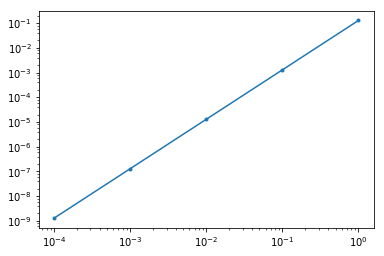

In [79]:
plt.loglog(dx,results, marker='.')

## Global error

Earlier, we considered the local error in the trapezoidal method for an infinitesimal domain - but what is the global error of the trapezoidal method?

Recall that the error term for the trapezoidal approximation depends on $f''(x)$, and this will differ for each of the $N$ intervals we are considering. So instead of computing the error term directly, we can deduce an upper bound for the total error.


Suppose that, over $a\leq x\leq b$, the maximum absolute value of $f''(x)$ is $M_2$ -- that is $|f''(x)|\leq M_2$.

Further, since the trapezoidal approximation is being applied $N$ times, the total error $E_T$ is bounded by

\begin{align}
	|E_T| \leq N\times \frac{1}{12}\Delta x^3 M_2
\end{align} 

Since $N=(b-a)/\Delta x$, this becomes

\begin{align}
	\boxed{|E_T| \leq \frac{b-a}{12}\Delta x^2 M_2}
\end{align}

We can now also see that the total error will scale quadratically with $\Delta x^2$; i.e. the trapezoidal rule is a **second order method**.

---
<div class="alert alert-warning">
**Example 3:**
<br>
Calculate the upper bound global error $|E_T|$ of the trapezoidal method for the integrand in Problem 2.
<br>
How does this result compare with your previous error analysis?
</div>

Let's set the values for $x$ and $dx$, and define $y$ over this grid. Then, we can use `numpy.gradient` to calculate the finite-difference approximation to the second derivative: 

*Note: alternatively, you can calculate the second derivative by hand*

In [27]:
dx = 0.01
x = np.arange(0, 1+dx, dx)
y = 1+2*np.cos(2*np.sqrt(x))

dy = np.gradient(y,x, edge_order=2)
d2y = np.gradient(dy,x,edge_order=2)

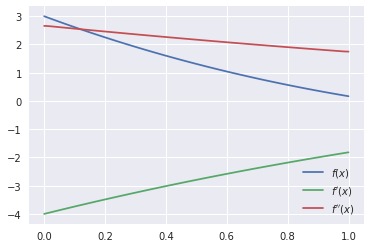

In [34]:
plt.plot(x,y)
plt.plot(x,dy)
plt.plot(x,d2y)
plt.legend(['$f(x)$',"$f'(x)$", "$f''(x)$"])

The second derivative of the integrand has a maximum at the point $x=0$: 

In [30]:
M2 = d2y[0]

In [32]:
Et = (1-0) * dx**2 * M2 / 12
print(Et)

2.21556085007e-05


From the previous plot, you can see that $\Delta x=0.01$ approximately gives an error of $\sim 10^{-5}$, so this seems pretty accurate!

# The Midpoint Rule

Let's return to the definite integral over an infinitesimal domain, but this time shift the integration limits like so:

\begin{align}
	\int_{x_0-\delta x/2}^{x_0+\delta x/2} f(\xi)~d\xi
\end{align}

Repeating our analysis of the previous section, taking the Taylor series around variable $\delta x$, we find

\begin{align}
	\int_{x_0-\delta x/2}^{x_0+\delta x/2} f(\xi)~d\xi = \delta x f(x_0) +\frac{1}{24} \delta x^3 f''(x_0) +\mathcal{O}\left(\delta x^4\right)
\end{align}

Comparing this to what we saw with the trapezoidal approximation, notice that the $f'(x_0)$ term vanishes; therefore we can make the so-called **midpoint approximation**,

\begin{align}
	\int_{x_0-\delta x/2}^{x_0+\delta x/2} f(\xi)~d\xi \approx f(x_0)\delta x,
\end{align}

named as such as we are now approximating the integral by integrating over the **constant** value of $f(x)$ evaluated at the *midpoint* of the domain -- i.e. essentially approximating the area under the curve via a **rectangle**:

![image](https://i.imgur.com/P8pW84g.png)

This approximation, which is significantly simpler than the trapezoidal approximation, is still accurate to order $\mathcal{O}(\delta x^3)$!

In fact, if we compare the error terms explicitly, the **local midpoint error** is 

\begin{align}
	\mathrm{local error}= \frac{1}{24} \delta x^3 f''(x),
\end{align}

Exactly half the value of the trapezoidal local error!

However, as before, we need to repeat or **composite** the mid-point approximation $N$ times over a non-infinitesimal interval in order to accurately approximate the integral,

\begin{align*}
	\int_a^b f(x)~dx &\approx \Delta x f\left(a+\Delta x/2\right)+ \Delta x f\left(a+\Delta x/2+\Delta x\right) + \cdots+ \Delta x f\left(a+\Delta x/2+(N-1)\Delta x\right)
\end{align*}


This gives rise to the **midpoint rule**:

\begin{align}
	\boxed{\int_a^b f(x)~dx \approx \Delta x \sum_{n=0}^{N-1}f\left(a+(n-\frac{1}{2})\Delta x\right)}
\end{align}

<br>
<div class="alert alert-success">
**Note:**
<br>
With only one function call, not two, per iteration, the midpoint rule offers a another advantage over the trapezoidal rule
</div>

<div class="alert alert-success">
**Aside:**
<br>
It turns out the midpoint rule is the leap-frog method, just in integral form!
<br><br>
Can you see how? Consider the first order differential equation $y'(x)=f(y(x),x)$; try integrating the left hand side using the fundamental theorem of calculus, and integrating the right hand side using the midpoint approximation. What do you get?
</div>

#### Discrete $x$ grids and functions

For an equally spaced discrete $x$ grid $$x_0,x_1,\dots,x_{N-1}$$ where $$x_0=a,~~x_{N-1}=b,~~x_{n+1}-x_n=\Delta x$$ then the midpoint rule can be written

\begin{align}
	\boxed{\int_a^b f(x)~dx \approx \Delta x \sum_{n=0}^{N-1}f\left(\frac{x_{n-1}+x_n}{2}\right)}
\end{align}

as $(x_{n-1}+x_n)/2$ provides the midpoint between the $n$th and $(n-1)$th grid position.

However, unlike with the trapezoidal rule, if only a discretised integrand $f(x_n)=f_n$ is provided, *and the function $f(x)$ is unknown*, then it is *impossible* to use the midpoint method, as you cannot accurately determine the function value at the midpoint.

## Global Error

Multiplying the local approximation error by $N=(b-a)/\Delta x$, and again letting $M_2=\max_{x\in[a,b]}|f''(x)|$, we can find the upper bound of the absolute value of the total error $|E_M|$:

\begin{align}
	\boxed{|E_M| \leq \frac{b-a}{24}\Delta x^2 M_2}
\end{align}

Thus the midpoint method is a **second order method**, and, when compared to the trapezoidal rule we *generally* find that $$|E_M|\approx \frac{1}{2}|E_T|$$

However, it is important to note that our expressions for $E_M$ and $E_T$ are given as *upper bounds*, so this error relationship does not always hold -- whilst for some functions we have the exact statement $E_M=-\frac{1}{2}E_T$, other functions can be constructed such that $E_M>E_T$.

# Simpson's Rule

Looking at the trapezoidal and midpoint approximation, you may notice that it's relatively easy to cancel out the *local* errors by adding them in a simple linear combination:

\begin{align}
	2LE_M + LE_T = 2\left(\frac{1}{24}\delta x^3 f''(x)\right) - \frac{1}{12}\delta x^2 f''(x) =0
\end{align}

It follows that by combining these two methods in the same way, we should end up with a higher order integral approximation. Let's give this a go, by considering an integral

\begin{align}
	I=\int_{x_0}^{x_0+2\delta x} f(\xi)~d\xi
\end{align}

Note that we have doubled the size of our interval, now of size $2\delta x$ -- this simply allows us to have a well defined 'midpoint' $x_0+\delta x$ which we can use for the midpoint rule. The midpoint rule and trapezoidal rule applied to $I$ therefore give:

\begin{align*}
	M &= 2\delta x f(x_0+\delta x)\\
	T &= \frac{1}{2}(2\delta x) [f(x_0)+f(x_0+2\delta x)] = \delta x[f(x_0)+f(x_0+2\delta x)]
\end{align*}

We can now combine $M$ and $T$ using the 'magic ratio' $2M+T$ from to approximate $I$ whilst eliminating the third order error terms:

\begin{align}
	I = \frac{1}{3}(2I+I) &\approx \frac{1}{3}(2M+T)= \frac{1}{3}\delta x[f(x_0)+4f(x_0+\delta x)+f(x_0+2\delta x)]
\end{align}

This is the well-known Simpson's rule:

\begin{align}
	\boxed{\int_{x_0}^{x_0+2\delta x} f(\xi)~d\xi\approx \frac{1}{3}\delta x[f(x_0)+4f(x_0+\delta x)+f(x_0+2\delta x)]}
\end{align}

To see just *how* much more accurate Simpson's rule is, we can expand both sides of Simpson's rule as Taylor series expansions of $\delta x$, giving an *local* error term of

\begin{align}
	LE_S = -\frac{1}{90}\delta x^5 f''''(x_0)
\end{align}

i.e. the local error is two orders of magnitude smaller than the trapezoidal and midpoint rule!


## Geometric interpretation

![image](https://i.imgur.com/HXGVia5.png)

Here you can see the geometric interpretation of Simpsons's rule. Note that the integrand $f(x)$ (in blue) is being approximated by a **quadratic polynomial** $P_2(x)$ (in red), which is found by interpolating between the three points $x_0$, $x_0+\delta x$, and $x_0+2\delta x$.


## Composite Simpson's Rule

For finite intervals, we need to apply Simpson's rule successively $N$ times in order to accurately approximate the integral (as in previous sections). This gives rise to the composite Simpson's rule:

\begin{align*}
	\int_a^b f(x)~dx&\approx \frac{1}{3}\Delta x [f(a) + 4 f(a+\Delta x) + f(a+2\Delta x) + f(a+2\Delta x) + 4 f(a+3\Delta x) + f(a+4\Delta x)\\
	&\hspace{2cm} + \cdots + f(a+(N-2)\Delta x) + 4 f(a+(N-1)\Delta x) + f(b)]\\[5pt]
	&\approx \frac{1}{3}\Delta x [f(a) + 4f(a+\Delta x)+2f(a+2\Delta x)+\cdots +4f(a+(N-1)\Delta x)+f(b)]
\end{align*}

Or, in summation notation,
\begin{align*}
	\boxed{\int_a^b f(x)~dx\approx \frac{1}{3}\Delta x \left[ f(a) + 2\sum_{n=1}^{N/2-1} f(a+ 2n\Delta x) + 4\sum_{n=1}^{N/2} f(a+ (2n-1)\Delta x) + f(b) \right]}
\end{align*}
Note that, unlike the midpoint and trapezoidal rules, we require $N$ be **even** for Simpson's Rule. This is due to the restriction that three points are required for the quadratic interpolation for each 'interval'.

### Discrete $x$ grids and functions

For an equally spaced discrete $x$ grid $$x_0,x_1,\dots,x_{N-1}$$ where $$x_0=a,~~x_{N-1}=b,~~x_{n+1}-x_n=\Delta x$$ then Simpson's rule can be written

\begin{align*}
	\boxed{\int_a^b f(x)~dx \approx \frac{1}{3}\Delta x \left[ f(x_0) + 2\sum_{n=1}^{N/2-1} f(x_{2n}) + 4\sum_{n=1}^{N/2} f(x_{2n-1}) + f(x_{N-1}) \right]}
\end{align*}

This expression can be also be used for an equally spaced discrete $f$ grid where $f(x_n)=f_n$, by making the appropriate substitutions above.

## Global Error

Like the midpoint and trapezoidal rules, we can determine an upper bound to the global composite error. Multiplying the local approximation error by $(b-a)/(2\Delta x)$ (since each iteration of the Simpson's rule takes place over an interval of size $2\Delta x$), and this time letting $M_4=\max_{x\in[a,b]}|f^{(4)}(x)|$, the upper bound of the absolute value of the total error is

\begin{align}
	\boxed{|E_S|\leq \frac{b-a}{180}\Delta x^4 M_4}
\end{align}

i.e. Simpson's rule is a **fourth order method**.

---
<div class="alert alert-info">
**Problem 4: Normalisation**
<br>
The wavefunction $\psi(x)$ of a quantum system, determined by solving the Schrodinger equation, satisfies the [Born rule](https://en.wikipedia.org/wiki/Born_rule). This states that the absolute value squared of the wavefunction, $|\psi(x)|^2$, provides the probability distribution of the system.
<br><br>
As such, we require the wavefunction to be **normalised**: $$\int_{-\infty}^{\infty}|\psi(x)|^2~dx=1$$
Or, using bra-ket notation where $\psi(x)=\left\langle x \middle|\psi\right\rangle$, $$\left\langle \psi \middle| \psi\right\rangle = \int_{-\infty}^{\infty}\psi(x)^*\psi(x)~dx=1$$
<br><br>
Below, I have provided a wavefunction for the ground state of the 1D simple harmonic oscillator, as well as the $x$ grid it has been discretised over.
</div>

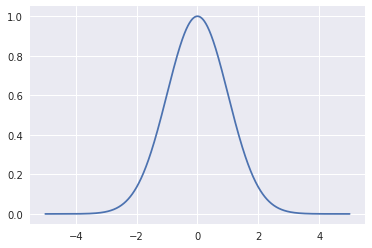

In [70]:
dx = 0.01
x = np.arange(-5,5+dx,dx)
psi = np.exp(-x**2/2)

plt.plot(x,psi)

<div class="alert alert-info">
<ol>
<li>Write a Python function that accepts a Numpy array representing a discretised function, and the $x$-grid spacing, and returns the integral using Simpson's rule.</li>
<li>Apply the function to the absolute value squared of the wavefunction provided. Is it normalised? If not, normalise it, and apply your Simpson's rule function to verify that it is now normalised.</li>
</ol>
</div>

In [77]:
def simpsons(f,dx):
    return (dx/3) * (f[0] + 2*np.sum(f[2:-1:2]) + 4*np.sum(f[1:-1:2]) + f[-1] )

In [78]:
A = simpsons(np.abs(psi)**2,dx)
print(A)
print(1/np.sqrt(A))

1.7724538509
0.751125544466


In [79]:
psiNorm = psi/np.sqrt(A)

In [80]:
simpsons(np.abs(psiNorm)**2,dx)

0.99999999999999989

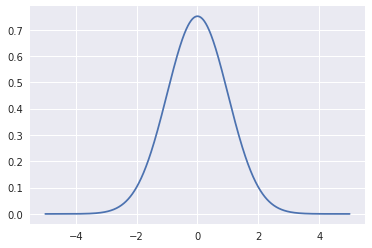

In [81]:
plt.plot(x,psiNorm)

# NumPy functions

Like with differentiation, NumPy and SciPy provides us with some useful functions to apply numerical integration without us having to worry about the underlying algorithm (although, it is still important to know how the different underlying techniques work!).

For example, to apply the composite trapezoidal rule, you can use [`numpy.trapz`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.trapz.html). Alternatively, to apply the composite Simpson's rule, use [`scipy.integrate.simps`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps).

For more details, see
* https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
* https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate